In [1]:
import sys
from CoRe_Dataloader_ECSG import *
from CoRe_Dataloader_From_File_With_Random_From_Tensors import *
import torch
import numpy as np
import matplotlib.pyplot as plt
import plotly as pt 
import plotly.graph_objects as go 
from  watpy.coredb.coredb import *
cdb = CoRe_db("./CoRe_DB/")


Index found, updating...

git-pull core_database_index ...
 
done!
 Found R01
 Found R02
 Found R03
 Found R04
Found BAM:0001
 Found R01
 Found R02
Found BAM:0002
 Found R01
 Found R02
Found BAM:0003
 Found R01
 Found R02
Found BAM:0004
 Found R01
 Found R02
Found BAM:0005
 Found R01
 Found R02
Found BAM:0006
 Found R01
 Found R02
Found BAM:0007
 Found R01
 Found R02
Found BAM:0008
 Found R01
Found BAM:0009
 Found R01
 Found R02
Found BAM:0010
 Found R01
 Found R02
Found BAM:0011
 Found R01
 Found R02
Found BAM:0012
 Found R01
 Found R02
Found BAM:0013
 Found R01
 Found R02
Found BAM:0014
 Found R01
 Found R02
Found BAM:0015
 Found R01
 Found R02
Found BAM:0016
 Found R01
 Found R02
Found BAM:0017
 Found R01
 Found R02
Found BAM:0018
 Found R01
 Found R02
Found BAM:0019
 Found R01
 Found R02
Found BAM:0020
 Found R01
 Found R02
Found BAM:0021
 Found R01
 Found R02
Found BAM:0022
 Found R01
Found BAM:0023
 Found R01
 Found R02
Found BAM:0024
 Found R01
Found BAM:0025
 Found R01
 Found R

In [2]:
a = CoRe_DB_Dataset()

In [3]:
example_total_data = cdb.sim["THC:0087"].run["R01"].data.read("rh_22").T

In [4]:
initial_time = example_total_data[0]*4.975e-6
initial_rstr = example_total_data[1]
initial_istr = example_total_data[2]
initial_ener = (example_total_data[1]**2 + example_total_data[2]**2)

In [5]:
postmerger_rstr = cut_at_lowest_envelope(initial_rstr, initial_istr)
postmerger_time = initial_time[-len(postmerger_rstr):]
postmerger_rstr.shape, postmerger_time.shape


((3694,), (3694,))

In [6]:
lts = len(postmerger_time)

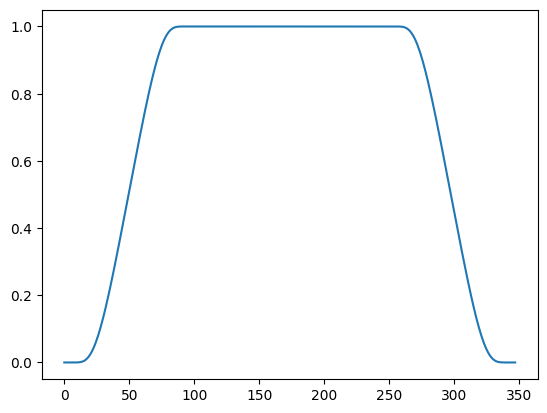

In [32]:
window = planck_window(100,350)
plt.plot(window)

In [28]:
math.floor(math.log(lts/2)*6), lts+2


(45, 3696)

In [7]:
window = planck_window(math.floor(math.log(lts/2)*6), lts+2)
windowx = np.linspace(0, len(window), len(window))

In [8]:
post_planck_rstr = np.multiply(postmerger_rstr, window,)

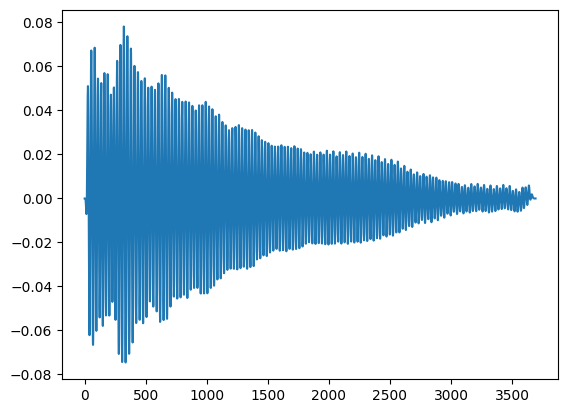

In [9]:
plt.plot(post_planck_rstr)

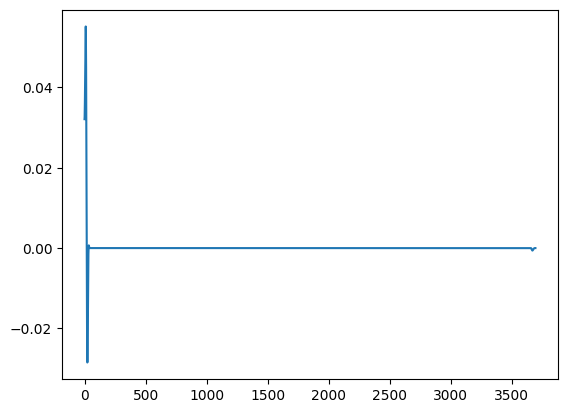

In [33]:
plt.plot(post_planck_rstr - postmerger_rstr)

In [10]:
postmerger_time

array([0.00725279, 0.00725708, 0.00726138, ..., 0.0230998 , 0.02310409,
       0.02310839])

In [11]:
from scipy import signal
morlet = signal.morlet(1000,w=10,s = .6)

In [12]:
sam_p = (postmerger_time[-1] - postmerger_time[0])/len(postmerger_time)


In [13]:
a,freqs = wt(postmerger_rstr, sam_p,True)
postmerger_awt = pad_width(a)

In [14]:
def newwt(postmerger, sam_p, getfreqs=False):
    sam_f = 1/sam_p
    scales = np.arange(scale_min, scale_max, 1)

    # CWT on the gwf using the Morlet wavelet
    coefs, freqs = pywt.cwt(postmerger, scales, 'morl', sampling_period=sam_p)

    # Normalising the coefficient matrix using the Frobenius norm
    Z = (np.abs(coefs))/(np.linalg.norm(coefs))
    if getfreqs:
        return Z, freqs
    return Z


In [15]:
a, freqs = newwt(postmerger_rstr, sam_p, True)


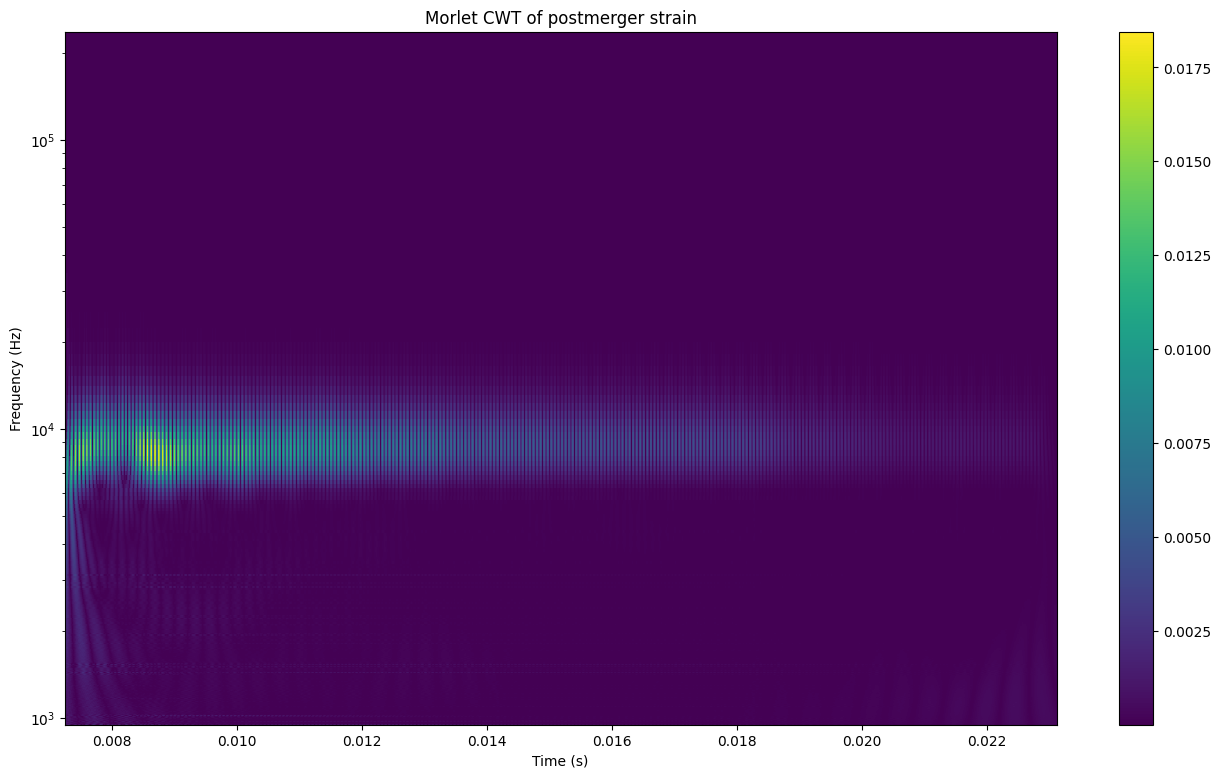

In [16]:
plt.figure(figsize=(16, 9))
plt.pcolormesh(postmerger_time,freqs,a)
plt.yscale('log')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.title('Morlet CWT of postmerger strain')
plt.show()

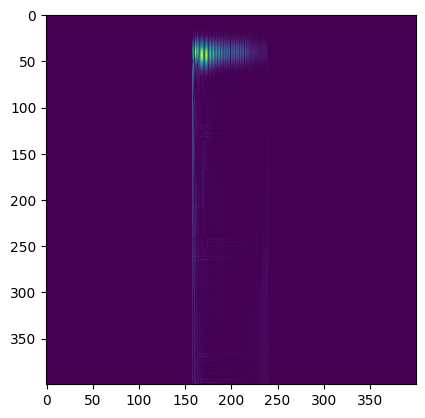

In [17]:
len(freqs[::5])
plt.imshow(postmerger_awt)

In [18]:
noised = np.random.normal(loc = 0,scale = 0.001/3.5, size = (400,400)) + postmerger_awt

In [19]:
# create a function to create a layout for plotly after taking in the x axes title, y axes title, and plot title
def get_layout(xtitle: str, ytitle: str, title: str, height: int, width: int) -> go.Layout:
    primary_color = rgba(133, 162, 204)
    secondary_color = rgba(168, 217, 255)
    grid_color = rgba(83, 107, 126)
    return go.Layout(
        title=dict(text=title,
                   font=dict(size=40, family="Verdana", color=primary_color),
                   ),
        xaxis=dict(title=dict(text=xtitle, font=dict(size=30, family="Verdana", color=secondary_color)),
                   showline=False,
                   linewidth=2,
                   linecolor=grid_color,
                   mirror=True,
                   showgrid=True,
                   gridwidth=2,
                   gridcolor=grid_color,
                   ),
        yaxis=dict(title=dict(text=ytitle, font=dict(size=30, family="Verdana", color=secondary_color)),
                   showline=False,
                   linewidth=2,
                   linecolor=grid_color,
                   mirror=True,
                   showgrid=True,
                   gridwidth=2,
                   gridcolor=grid_color,
                   ),
        showlegend=True,
        legend=dict(
            font=dict(size=30, family="Verdana", color=secondary_color),
            itemwidth=30,
            itemsizing="constant",
            orientation="h",
            xanchor="center",
            yanchor="top",
            x=.5,
            y=1
        ),
        margin=dict(t=200),
        font=dict(size=25, family="Verdana", color=secondary_color),
        width=width,
        height=height,
        plot_bgcolor=rgba(0, 0, 0, 255),
        paper_bgcolor=rgba(0, 0, 0, 255),
    )


def pplt(data: List[object], xtitle: str = "XTITLE the quick brown fox jumped over the lazy dog", ytitle: str = "YTITLE the quick brown fox jumped over the lazy dog", title: str = "PLOTTITLE the quick brown fox jumped over the lazy dog", height: int = -1, width: int = -1):
    fig = go.Figure(data=data, layout=get_layout(
        xtitle, ytitle, title, height, width))
    return fig


def rgba(r: int = 0, g: int = 0, b: int = 0, a: int = 255) -> str:
    return f"rgba({r},{g},{b},{a})"


In [20]:
freqs[-1], freqs[0]

(946.4716709052985, 189294.3341810597)

In [21]:
freqs[::5][::50]


array([189294.33418106])

In [24]:
title = "Postmerger Waveform Energy Vs. Time [THC:0087]"
fig = pplt(
    [
        # go.Scatter(x=initial_time, y=initial_rstr, name="Complete Merger Waveform", line=dict(
        #     width=4, color=rgba(255, 255, 255))),

        go.Scatter(x=postmerger_time, y=postmerger_rstr, name="Postmerger Only Waveform", line=dict(
            width=4, color=rgba(140, 255, 205))),

        # go.Scatter(x=initial_time, y=initial_ener, name="Total Waveform Energy", line=dict(
        #     width=4, color=rgba(255, 200-20, 200-20))),

        # go.Heatmap(z=noised, colorscale="Ice",
        #            colorbar=dict(title='Energy')),
    ],
    height=900,
    width=1600, title=title, ytitle="Strain", xtitle="Time")
# fig.update_yaxes(range=[-.25, .25])
# fig.update_layout(yaxis = dict(tickmode = "array",
#                                 tickvals = [0,50,100,150,200,250,300,350,400],
#                                ticktext=freqs))
fig.show()
